<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/Lung_Cancer_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/lung_cancer_.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [5]:
df.describe(include='all')

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
count,59,59,59.000000,59.000000,59.000000,59.000000,59.000000
unique,49,49,NaN,NaN,NaN,NaN,NaN
top,Katharine,Hepburn,NaN,NaN,NaN,NaN,NaN
freq,4,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,42.627119,15.067797,5.203390,3.237288,0.474576
std,NaN,NaN,16.235230,7.984607,2.461984,2.380517,0.503640
min,NaN,NaN,18.000000,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,29.000000,10.000000,3.000000,1.000000,0.000000
50%,NaN,NaN,39.000000,15.000000,5.000000,3.000000,0.000000
75%,NaN,NaN,55.000000,20.000000,7.500000,5.000000,1.000000


In [7]:
df.shape

(59, 7)

In [8]:
print(df.isna().sum())

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64


In [9]:
df=df.drop(['Name','Surname'],axis=1)

In [10]:
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

array([[1.        , 0.66666667, 0.44444444, 0.5       ],
       [0.30508475, 0.43333333, 0.44444444, 0.25      ],
       [0.49152542, 0.4       , 0.77777778, 0.        ],
       [0.59322034, 0.66666667, 0.55555556, 0.375     ],
       [0.27118644, 0.4       , 0.77777778, 0.        ],
       [0.22033898, 0.66666667, 0.88888889, 0.5       ],
       [0.42372881, 1.        , 0.22222222, 1.        ],
       [0.6440678 , 0.66666667, 0.22222222, 0.375     ],
       [0.16949153, 0.66666667, 0.11111111, 1.        ],
       [0.06779661, 0.66666667, 0.55555556, 0.25      ],
       [0.40677966, 0.4       , 0.55555556, 0.25      ],
       [0.49152542, 0.5       , 0.        , 1.        ],
       [0.01694915, 0.4       , 0.77777778, 0.        ],
       [0.13559322, 0.43333333, 0.55555556, 0.125     ],
       [0.74576271, 0.83333333, 0.22222222, 0.5       ],
       [0.44067797, 0.16666667, 0.77777778, 0.125     ],
       [0.84745763, 0.13333333, 0.44444444, 0.75      ],
       [0.27118644, 0.83333333,

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [22]:
ypred=rfc.predict(xtest)
ypred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [24]:
print(rfc.predict([[35,3,5,4]]))

[1]


In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
r1=accuracy_score(ytest,ypred)
r2=classification_report(ytest,ypred)

In [30]:
print('Accuracy=',r1)
print(r2)

Accuracy= 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



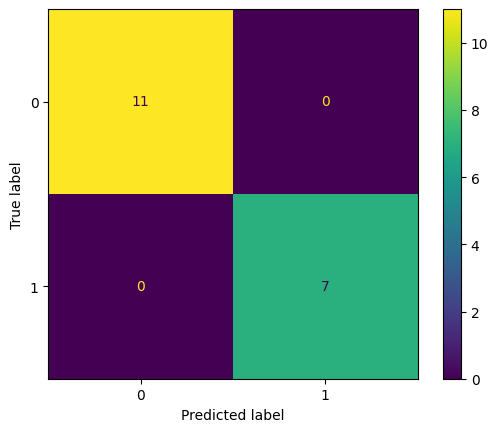

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred)